# Result Analysis

## Imports

In [127]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pm4py
import re

from sklearn.metrics import silhouette_score
from scipy.stats import pearsonr

## Inputs

In [128]:
lpms_directory = os.path.abspath("./data/lpms") # this is the directory that includes the sets of local process models
scripts_directory = os.path.abspath("./scripts/clustering")

res_directory = os.path.abspath("results") # this it the directory where results will be outputted
res_directory_set_wise = os.path.abspath("results/set_wise") # this it the directory where results will be outputted

analysis_directory = os.path.abspath("analysis")

In [129]:
measures_dict = {"full":"full_trace_matching", "efg":"efg", "ged":"ged", "node":"node", "transition":"transition_label"}
measures = ['full', 'efg', 'ged', 'node', 'transition']

In [130]:
cl_res_df = pd.read_csv(os.path.join(res_directory, "ss", "complete_ss.csv"))
cl_res_df

,Event Log,Distance Threshold,Measure,Num Clusters,Iteration,efg,full,ged,node,transition
0,Road_Traffic_Fine_Management_Process,0.1,efg,52,725,0.419928,0.213831,-0.009251,0.027040,-0.030000
1,Road_Traffic_Fine_Management_Process,0.4,full,20,725,-0.026918,0.289116,-0.066074,-0.119204,-0.308793
2,Road_Traffic_Fine_Management_Process,0.8,full,5,725,0.095055,0.153358,0.067034,0.080187,0.025933
3,Road_Traffic_Fine_Management_Process,0.7,efg,4,725,0.227394,0.133882,0.217704,0.223866,0.323858
4,Road_Traffic_Fine_Management_Process,0.2,efg,27,725,0.456786,0.169013,0.156027,0.228099,0.150000
...,...,...,...,...,...,...,...,...,...,...
436995,Hospital Billing - Event Log,0.4,node,10,26,0.526946,0.245938,0.220801,0.444703,0.685533
436996,Hospital Billing - Event Log,0.4,efg,3,26,0.306949,0.191029,0.215609,0.336457,0.403731
436997,Hospital Billing - Event Log,0.1,transition,17,26,0.670775,0.256277,0.252427,0.502523,1.000000
436998,Hospital Billing - Event Log,0.5,node,9,26,0.503985,0.257692,0.241956,0.437656,0.653824


In [131]:
cl_res_df_agg = cl_res_df.groupby(['Event Log', 'Distance Threshold', 'Measure'])[measures].mean()
cl_res_df_agg = cl_res_df_agg.reset_index()

In [136]:
# transform to different format
cl_res_df_ss = pd.melt(cl_res_df,
                       id_vars=['Event Log', "Measure", "Distance Threshold", "Num Clusters", "Iteration"],
                       value_vars=['efg', 'full', 'ged', 'node', 'transition'],
                       var_name='ss_measure', value_name='ss')
cl_res_df_ss["self"] = cl_res_df_ss.apply(lambda row: "yes" if row["ss_measure"] == row["Measure"] else "no", axis=1)

# transform to different format
cl_res_df_agg_ss = pd.melt(cl_res_df_agg,
                       id_vars=['Event Log', "Measure", "Distance Threshold"],
                       value_vars=['efg', 'full', 'ged', 'node', 'transition'],
                       var_name='ss_measure', value_name='ss')
cl_res_df_agg_ss["self"] = cl_res_df_agg_ss.apply(lambda row: "yes" if row["ss_measure"] == row["Measure"] else "no", axis=1)

In [137]:
# keep only rows for self ss
self_df_ss = cl_res_df_ss[cl_res_df_ss.apply(lambda row: row["Measure"]==row["ss_measure"], axis=1)]
# keep only rows for self ss
self_df_agg_ss = cl_res_df_agg_ss[cl_res_df_agg_ss.apply(lambda row: row["Measure"]==row["ss_measure"], axis=1)]

In [139]:
idx = self_df_ss.groupby(['Measure', 'Event Log'])['ss'].transform(max) == self_df_ss['ss']
self_df_ss_max = self_df_ss[idx]
self_df_ss_max_measure = self_df_ss_max.drop_duplicates(["Measure"])
self_df_ss_max_log_measure = self_df_ss_max.drop_duplicates(["Event Log", "Measure"])
self_df_ss_max_log_measure

,Event Log,Measure,Distance Threshold,Num Clusters,Iteration,ss_measure,ss,self
8,Road_Traffic_Fine_Management_Process,efg,0.4,13,725,efg,0.608673,yes
67011,BPI_Challenge_2012,efg,0.4,46,725,efg,0.325952,yes
174009,BPI Challenge 2017 - Offer log,efg,0.4,9,725,efg,0.653801,yes
242015,PrepaidTravelCost,efg,0.4,27,725,efg,0.556330,yes
353013,Hospital Billing - Event Log,efg,0.2,18,725,efg,0.686847,yes
437041,Road_Traffic_Fine_Management_Process,full,0.3,33,725,full,0.366820,yes
504045,BPI_Challenge_2012,full,0.5,22,725,full,0.353228,yes
611059,BPI Challenge 2017 - Offer log,full,0.2,49,725,full,0.338005,yes
679016,PrepaidTravelCost,full,0.7,2,725,full,0.331958,yes
790076,Hospital Billing - Event Log,full,0.4,30,725,full,0.392709,yes


## Correlation Analysis

In [140]:
pearson = pd.DataFrame(index=cl_res_df['Measure'].unique(), columns=cl_res_df['Measure'].unique())

measures = ["full", "efg", "ged", "node", "transition"]

for measure1 in measures:
    for measure2 in measures:
        corr, _ = pearsonr(cl_res_df[measure1], cl_res_df[measure2])
        pearson[measure1][measure2] = corr

pearson.to_csv(os.path.join(analysis_directory, "pearson.csv"))

## Cluster Compactness

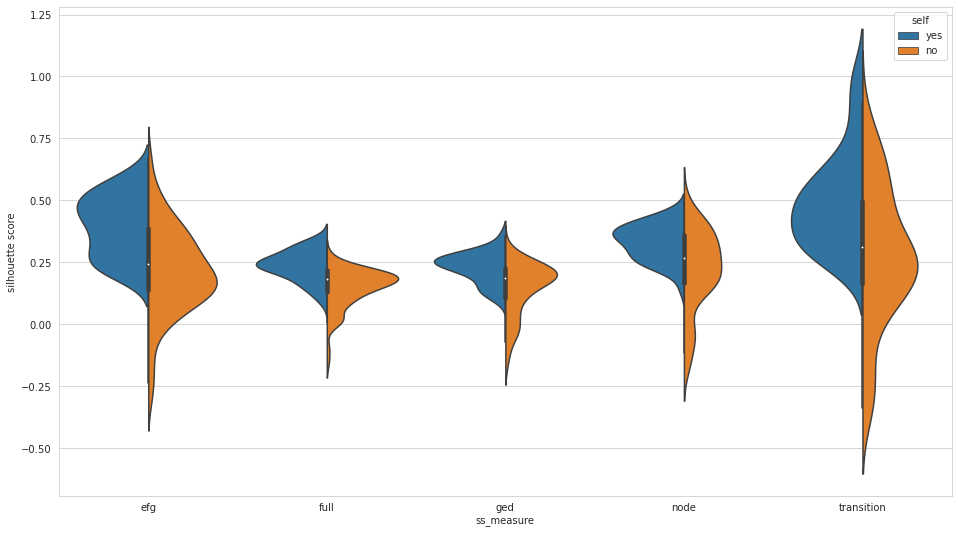

In [141]:
fig, ax = plt.subplots(figsize=(16, 9))

data = cl_res_df_agg_ss
sns.violinplot(ax=ax, data=data, x="ss_measure", y="ss", hue="self", split=True)
ax.set(ylabel='silhouette score')

fig.savefig(os.path.join(analysis_directory, "ss_violin.svg"))

# Export clusters

In [103]:
for ind, row in self_df_ss_max_measure.iterrows():
    log = row["Event Log"]
    thr = row["Distance Threshold"]
    measure = measures_dict[row["Measure"]]
    iter = row["Iteration"]
    print(log + " " + measure + " " + str(thr))
    cl = pd.read_csv(os.path.join(res_directory_set_wise,
                                  log,
                                  "clustering",
                                  iter,
                                  "clustering_hierarchical_complete_{thr}_{measure}.csv".format(thr=thr, measure=measure)),
                     index_col=0)


    lpms_dir = os.path.abspath(os.path.join(lpms_directory, log))
    dir_cl_nets = os.path.abspath(os.path.join(analysis_directory, "cluster_nets", measure + "_" + log))
    if not os.path.exists(dir_cl_nets): os.makedirs(dir_cl_nets)

    ind = 0
    for label in cl["Labels"].unique():
        net_files = cl.loc[cl["Labels"]==label]["Nets"]
        for file in net_files:
            cluster_dir = os.path.join(dir_cl_nets, str(label))
            if not os.path.exists(cluster_dir): os.mkdir(cluster_dir)
            net = pm4py.read_pnml(os.path.join(lpms_dir, file))
            pm4py.save_vis_petri_net(*net, file_path=os.path.join(cluster_dir, "net"+str(ind)+".svg"))
            ind = ind+1

Road_Traffic_Fine_Management_Process efg 0.4
Road_Traffic_Fine_Management_Process full_trace_matching 0.3
Road_Traffic_Fine_Management_Process ged 0.2
Road_Traffic_Fine_Management_Process node 0.1
Road_Traffic_Fine_Management_Process transition_label 0.1


## Repetition Analysis

In [142]:
# read lpm datasets
lpm_sets = [name for name in os.listdir(lpms_directory) if os.path.isdir(os.path.join(lpms_directory, name))]
lpm_sets_res = {}
for lpm_set in lpm_sets:
    lpm_sets_res[lpm_set] = pd.read_csv(os.path.join(lpms_directory, lpm_set, lpm_set + ".csv"))
print(lpm_sets)

['Road_Traffic_Fine_Management_Process', 'BPI_Challenge_2012', 'BPI Challenge 2017 - Offer log', 'PrepaidTravelCost', 'Hospital Billing - Event Log']


<Figure size 432x288 with 0 Axes>

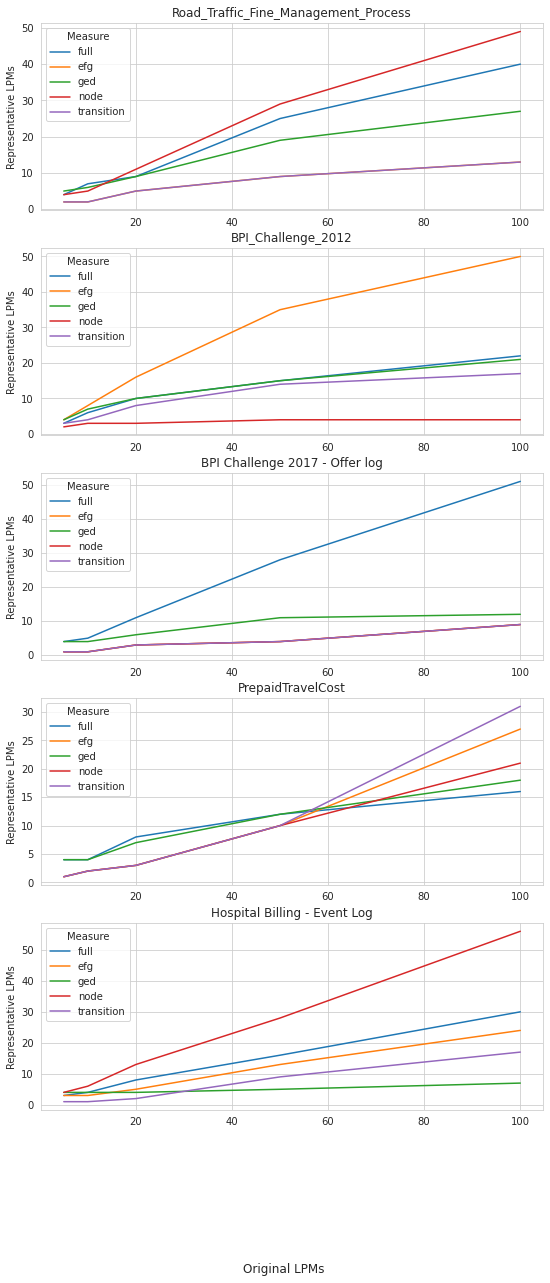

In [149]:
# repetition analysis
plt.tight_layout()
count_plots = len(lpm_sets) # one plot for each log
fig, axs = plt.subplots(count_plots, 1, figsize=(9,4*count_plots))

x = [5, 10, 20, 50, 100] # we compare decrease in the highest ranked x models
ind = 0
for log in lpm_sets_res.keys():
    curr_ax = axs
    if count_plots > 1:
        curr_ax = axs[ind] # each plot has its own axes

    # create the structure of the data we will plot
    df_log = pd.DataFrame({'Original LPMs': pd.Series(dtype='int'), 'Representative LPMs': pd.Series(dtype='int'), 'Measure': pd.Series(dtype='str')})
    for measure in measures:
        # get best clustering per event log and measure
        df_ss_one = self_df_ss_max_log_measure.loc[(self_df_ss_max_log_measure["Event Log"]==log) & (self_df_ss_max_log_measure["ss_measure"]==measure)]
        if len(df_ss_one) <= 0:
            print(log + " " + measure)
            continue
        # for dist_threshold in df_ss_one["Distance Threshold"].unique():
            # find the file that contains the clustering results
        file = "clustering_hierarchical_complete_" + str(df_ss_one['Distance Threshold'].iloc[0]) + "_" + measures_dict[measure] + ".csv"
        path = os.path.join(res_directory_set_wise, log, "clustering", str(df_ss_one['Iteration'].iloc[0]), file)
        if not os.path.exists(path):
            print(path)
            continue
        df_clust = pd.read_csv(path, index_col=0)
        df_clust = pd.merge(df_clust, lpm_sets_res[log], left_on="Nets", right_on="Name")
        df_clust.sort_values("Aggregated Score", axis=0, inplace=True, ascending=False)
        y = [len(df_clust.iloc[:xone]["Labels"].unique()) for xone in x]
        curr_df = pd.DataFrame(data = {'Original LPMs': x, 'Representative LPMs': y, 'Measure': [measure] * 5})
        df_log = pd.concat([df_log, curr_df])
    curr_ax.set(title=log)
    legend = curr_ax.get_legend()
    if legend is not None: legend.remove()
    sns.lineplot(ax=curr_ax, data = df_log, x="Original LPMs", y="Representative LPMs", hue="Measure")
    curr_ax.set(xlabel=None)
    ind = ind + 1

# fig.legend(loc="upper left")
fig.supxlabel("Original LPMs")
fig.savefig(os.path.join(analysis_directory, "model_repetition.svg"))

## Time Analysis

In [152]:
times = {}
for f_log in os.listdir(res_directory_set_wise):
    # import times for all log measure pairs
    distances_dir = os.path.join(res_directory_set_wise, f_log, "distances")
    for f_time in os.listdir(distances_dir):
        if f_time.endswith("times.csv"):
            match_measure = re.search('model_(.*)_times.csv', os.path.basename(f_time))
            if match_measure is not None:
                measure = match_measure.group(1)
                time_df = pd.read_csv(os.path.join(distances_dir, f_time), index_col=0).fillna(1)
                np_time = time_df.to_numpy()

                times[(f_log, measure)] = np_time

In [159]:
for measure in measures_dict.values():
    total_time = 0
    total_count = 0
    for log in os.listdir(lpms_directory):
        total_time = total_time + times[(log, measure)].sum()
        total_count = total_count + times[(log, measure)].shape[0]**2
    print("Measure: " + measure)
    print("Total time: " + str(total_time))
    print("Total count: " + str(total_count))
    print("Individual time: " + str(total_time / total_count))

Measure: full_trace_matching
Total time: 15.934032029997631
Total count: 46241
Individual time: 0.00034458666616201273
Measure: efg
Total time: 8.291959349997757
Total count: 46241
Individual time: 0.00017932050236797988
Measure: ged
Total time: 50972.86170381101
Total count: 46241
Individual time: 1.1023304362754052
Measure: node
Total time: 12.054428087997678
Total count: 46241
Individual time: 0.00026068701126700714
Measure: transition_label
Total time: 3.2787673069999643
Total count: 46241
Individual time: 7.090606403408153e-05
